In [39]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

from collections import Counter

In [40]:
def kmeans_prepare(data):
    
    # Getting the data
    
    df = pd.read_csv(data)
    df = df.drop(['customerid'],axis=1)
    numerical = df.iloc[:,:3]
    
    # Scaling the columns tenure, monthlycharges and totalcharges
    
        # Initialize StandardScaler instance
    scaler = StandardScaler()

        # Fit and transform the scaler on numerical columns
    scaled_numerical = scaler.fit_transform(numerical)
    scaled_numerical = pd.DataFrame(scaled_numerical, columns=numerical.columns)
    df= df.drop(columns=numerical.columns, axis = 1)
    new_df = df.merge(right=scaled_numerical, how ="left", left_index = True, right_index = True)
    
    # Now we split up into X and y. This is because y are the labels and we don't want those for
    # the clustering but we'll keep it around to compare.
    
    X = new_df.drop(['churn_Yes'],axis=1)
    y= new_df['churn_Yes']
    
    # We now use a visualizer to choose our optimal amount of clusters.
    
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,12)).fit(X)
    value = visualizer.elbow_value_

    def kmeans_cluster(value):
    
    # We apply Kmeans clustering
    
        clusters = value
        kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=0)
        y_predicted = kmeans.fit_predict(X)
    
        # Add the clusters to the the cleaned dataset .csv.
    
        data = pd.read_csv('Cleaned_Dataset.csv')
        data['cluster'] = y_predicted
        data.to_csv("Clustered_data.csv", index=False, encoding="utf-8-sig")

        # print amount of iterations
        n = kmeans.n_iter_
        print(f'It took Kmeans {n} iterations.')
    
        # Show the division of the clusters.
    
        print('An overview of the clusters')
        print(Counter(kmeans.labels_))
    
        # Apply PCA
    
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(X)
        principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
                            # print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')
        
        finalDf = pd.concat([principalDf, y], axis = 1)
        
    
        # Plot the PCA
 
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('2 component PCA', fontsize = 20)
    
        sns.scatterplot( finalDf['principal component 1']
            , finalDf['principal component 2']
            , hue = kmeans.labels_
            , s = 50)
        ax.legend()
        ax.grid()
    kmeans_cluster(value)

It took Kmeans 14 iterations.
An overview of the clusters
Counter({0: 1997, 1: 1836, 3: 1684, 2: 1526})


C:\Users\krist\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


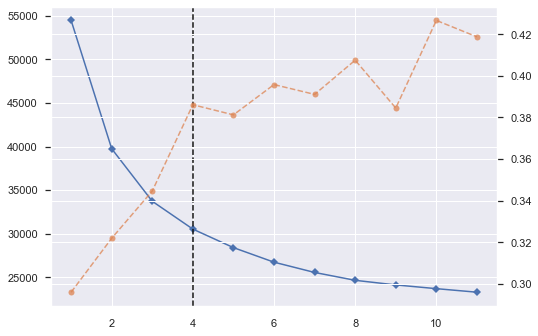

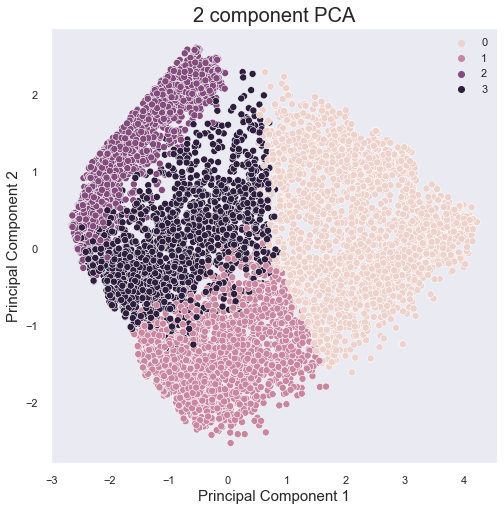

In [41]:
kmeans_prepare('Dummy_data.csv')


In [4]:
def kmeans_cluster(clusters):
    
    # We apply Kmeans clustering
    
    kmeans = KMeans(n_clusters=clusters, init='k-means++', random_state=0)
    y_predicted = kmeans.fit_predict(X)
    
    # Add the clusters to the new dataframe and save them to .csv.
    new_df['cluster'] = y_predicted
    new_df.to_csv("Clustered_data.csv", index=False, encoding="utf-8-sig")
    
    return new_df.head()

In [8]:
kmeans_cluster(4)

NameError: name 'X' is not defined

In [ ]:
def pca_visualize():
    
    # print amount of iterations
    n = kmeans.n_iter_
    print(f'It took Kmeans {n} iterations.')
    
    # Show the division of the clusters.
    
    print('An overview of the clusters')
    print(Counter(kmeans.labels_))
    
    # Apply PCA
    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
                            # print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')
        
    finalDf = pd.concat([principalDf, y], axis = 1)
    
    # Plot the PCA
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    
    sns.scatterplot( finalDf['principal component 1']
            , finalDf['principal component 2']
            , hue = kmeans.labels_
            , s = 50)
    ax.legend()
    ax.grid()

In [ ]:
pca_visualize()

In [ ]:
print(kmeans.labels_[:20])
print(len(kmeans.labels_))

kmeans.cluster_centers_

kmeans.n_iter_

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=new_df, x="tenure", y="monthlycharges", hue=kmeans.labels_)
plt.show()

In [ ]:
sns.scatterplot(data=new_df, x="tenure", y="totalcharges", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

## PCA

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print(f'Explained variance ratio from PCA: {pca.explained_variance_ratio_}')

In [ ]:
principalDf

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [ ]:
finalDf

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
    
sns.scatterplot( finalDf['principal component 1']
            , finalDf['principal component 2']
            , hue = kmeans.labels_
            , s = 50)
ax.legend()
ax.grid()
